Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import kmeans_plusplus

Data Collection & Preprocessing

In [ ]:
#loading the dataset
df = pd.read_csv('/content/1_T72_01.csv')

In [ ]:
#how does the data look like?
df.sample(5)

,time,Fx,Fy,Fz
131895,6.5948,-1.579200,-0.056140,0.592230
58318,2.9159,-0.006551,-0.032962,0.073569
31361,1.5680,0.004894,0.030215,-0.017880
8070,0.4035,-0.001359,0.025386,0.036840
52399,2.6199,0.014112,0.026464,-0.017151


In [ ]:
#what is the size of the data??
df.shape

(226000, 4)

In [ ]:
#what is the datatype of columns??
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226000 entries, 0 to 225999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    226000 non-null  float64
 1   Fx      226000 non-null  float64
 2   Fy      226000 non-null  float64
 3   Fz      226000 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


In [ ]:
#how does the data look mathematically??
df.describe()

,time,Fx,Fy,Fz
count,226000.000000,226000.000000,226000.000000,226000.000000
mean,5.649975,-0.377022,0.288526,0.792433
std,3.262036,0.512186,0.481627,0.939845
min,0.000000,-1.916500,-1.204600,-0.715120
25%,2.824975,-0.756445,-0.025432,0.032831
50%,5.649950,-0.113660,0.102885,0.464730
75%,8.474925,0.008539,0.697310,1.398700
max,11.300000,0.403620,1.693800,4.952500


In [ ]:
#checking for missing values
df.isnull().sum()

,0
time,0
Fx,0
Fy,0
Fz,0


In [ ]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking for the correlation between columns
df.corr()

,time,Fx,Fy,Fz
time,1.000000,-0.211028,0.366869,0.682275
Fx,-0.211028,1.000000,-0.207414,-0.194077
Fy,0.366869,-0.207414,1.000000,0.161320
Fz,0.682275,-0.194077,0.161320,1.000000


Exploratory Data Analysis

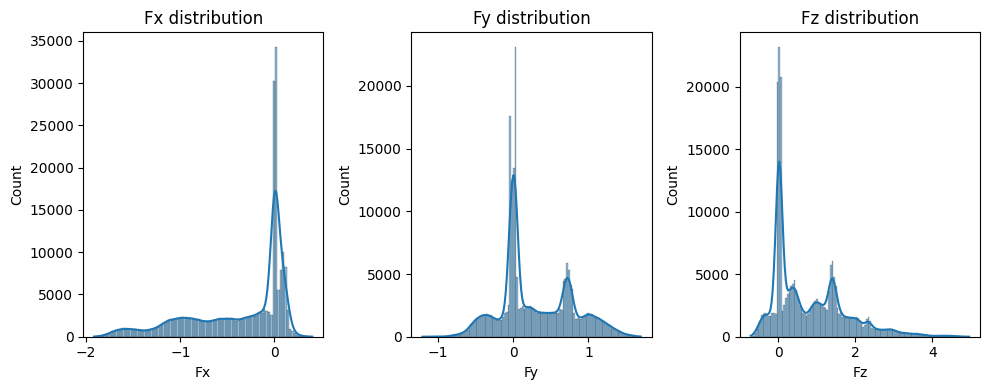

In [ ]:
#Distribution Plots
plt.figure(figsize=(10,4))
for i, col in enumerate(('Fx','Fy','Fz')):
  plt.subplot(1,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col+' distribution')
plt.tight_layout()
plt.show()

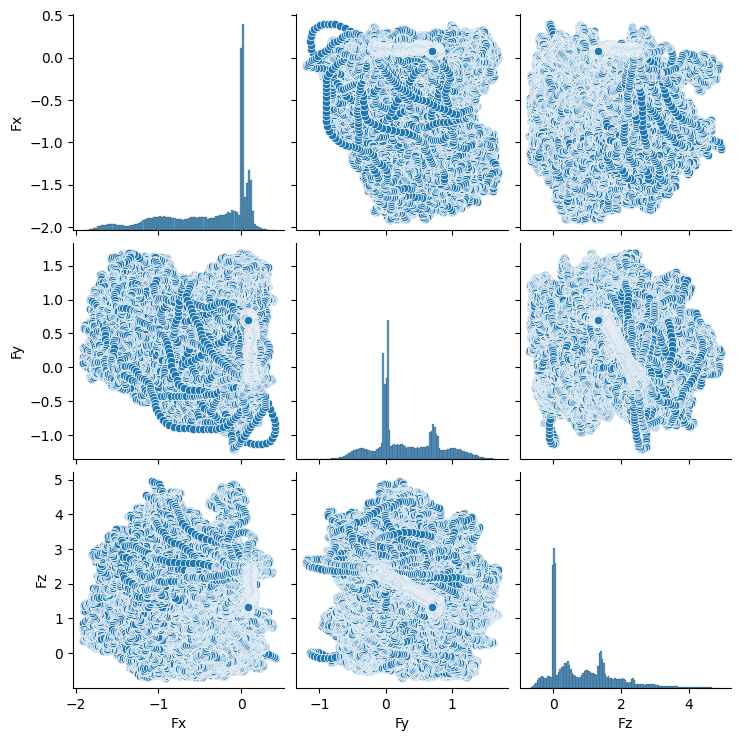

In [ ]:
#Pairplot of forces
sns.pairplot(df[['Fx','Fy','Fz']])
plt.show()

Feature Engineering

In [ ]:
from scipy.stats import skew, kurtosis


In [ ]:
def extract_features(df):
  features = {}

  #Statistical Features
  for col in ['Fx','Fy','Fz']:
    features[f'{col}_mean'] = df[col].mean()
    features[f'{col}._std'] = df[col].std()
    features[f'{col}._min'] = df[col].min()
    features[f'{col}._max'] = df[col].max()
    features[f'{col}._range'] = df[col].max() - df[col].min()
    features[f'{col}._skew'] = skew(df[col])
    features[f'{col}._kurt'] = kurtosis(df[col])

  #Vector Magnitude
  df['Fmag'] = np.sqrt(df['Fx']**2 + df['Fy']**2 + df['Fz']**2)
  features['Fmag_mean'] = df['Fmag'].mean()
  features['Fmag_std'] = df['Fmag'].std()
  features['Fmag_rms'] = np.sqrt(np.mean(df['Fmag']**2))

  #Correlations
  features['corr_Fx_Fy'] = df['Fx'].corr(df['Fy'])
  features['corr_Fy_Fz'] = df['Fy'].corr(df['Fz'])
  features['corr_Fx_Fz'] = df['Fx'].corr(df['Fz'])

  #Time-based features (slope/trend)
  for col in ['Fx', 'Fy', 'Fz']:
      slope = np.polyfit(df['time'], df[col], 1)[0]
      features[f'{col}_slope'] = slope

  return pd.DataFrame([features])

features_df = extract_features(df)
print(features_df.head())





    Fx_mean   Fx._std  Fx._min  Fx._max  Fx._range  Fx._skew  Fx._kurt  \
0 -0.377022  0.512186  -1.9165  0.40362    2.32012 -0.972396 -0.235593   

    Fy_mean   Fy._std  Fy._min  ...  Fz._kurt  Fmag_mean  Fmag_std  Fmag_rms  \
0  0.288526  0.481627  -1.2046  ...  0.770992   1.160164  0.940727  1.493635   

   corr_Fx_Fy  corr_Fy_Fz  corr_Fx_Fz  Fx_slope  Fy_slope  Fz_slope  
0   -0.207414     0.16132   -0.194077 -0.033134  0.054167  0.196574  

[1 rows x 30 columns]


In [ ]:
features_df.head()

,Fx_mean,Fx._std,Fx._min,Fx._max,Fx._range,Fx._skew,Fx._kurt,Fy_mean,Fy._std,Fy._min,...,Fz._kurt,Fmag_mean,Fmag_std,Fmag_rms,corr_Fx_Fy,corr_Fy_Fz,corr_Fx_Fz,Fx_slope,Fy_slope,Fz_slope
0,-0.377022,0.512186,-1.9165,0.40362,2.32012,-0.972396,-0.235593,0.288526,0.481627,-1.2046,...,0.770992,1.160164,0.940727,1.493635,-0.207414,0.16132,-0.194077,-0.033134,0.054167,0.196574


Feature Selection

In [ ]:
window_size = 100
feature_list = []

for start in range(0, len(df), window_size):
    window_df = df.iloc[start:start+window_size]
    if len(window_df) >= 10:
        feature_list.append(extract_features(window_df))

# Combined all windows into one dataframe
features_df = pd.concat(feature_list, ignore_index=True)

/tmp/ipython-input-2613550773.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fmag'] = np.sqrt(df['Fx']**2 + df['Fy']**2 + df['Fz']**2)


In [ ]:
# Scaled features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df.drop(columns=['cluster'], errors='ignore'))

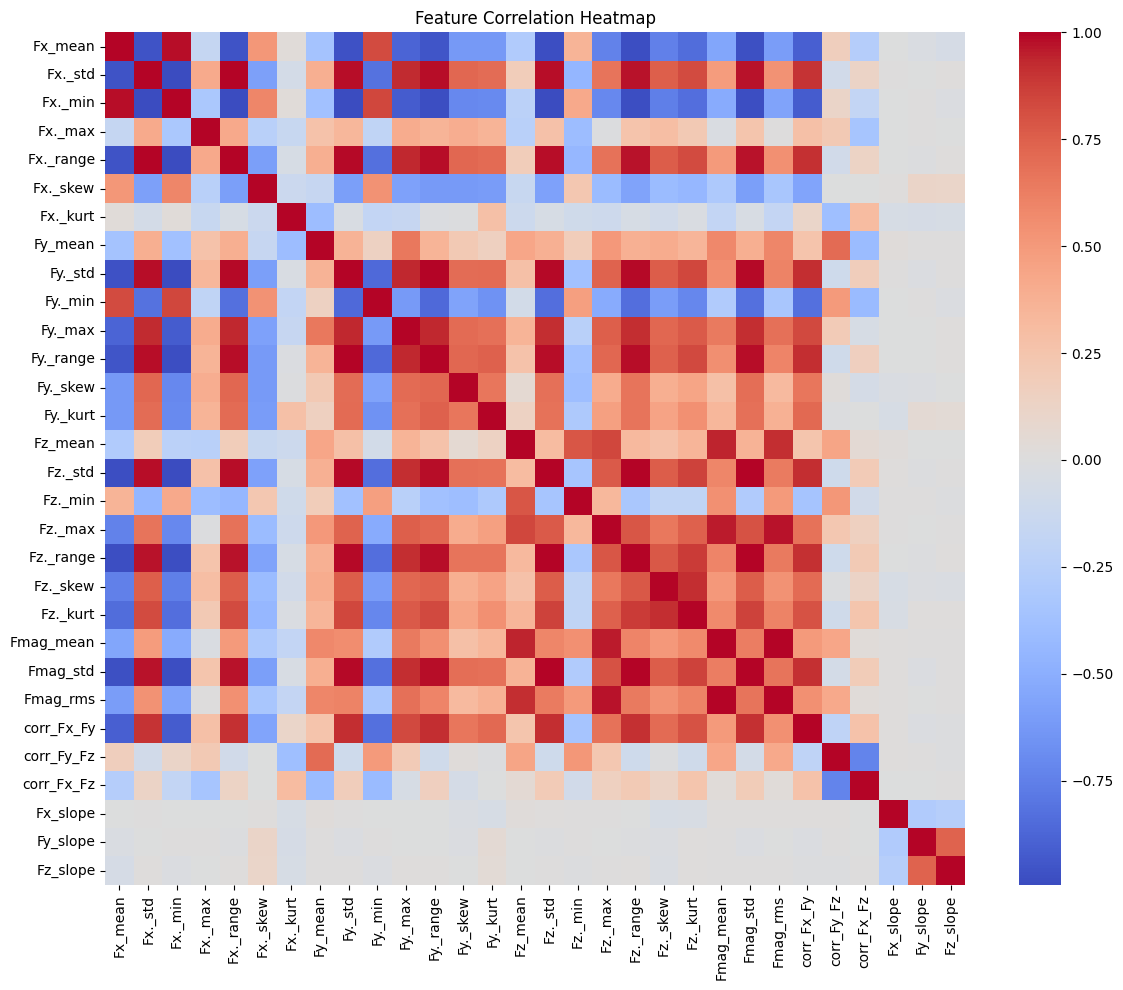

In [ ]:
# Correlation Heatmap of Extracted Features
corr_matrix = features_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


Model Training and Evaluation

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Computing the  force magnitude
df['Fmag'] = np.sqrt(df['Fx']**2 + df['Fy']**2 + df['Fz']**2)

# Reshaped the data for clustering
X = df[['Fmag']].values

# Applying K-means with 2 clusters (machining vs non-machining)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Computing the force magnitude
df['Fmag'] = np.sqrt(df['Fx']**2 + df['Fy']**2 + df['Fz']**2)

# Reshaped the data for clustering
X = df[['Fmag']].values

# Applying K-means with 2 clusters (machining vs non-machining)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters  # Adding cluster labels to df

print(df.head())


      time        Fx        Fy        Fz      Fmag  cluster
0  0.00000 -0.000246 -0.000191 -0.001684  0.001712        0
1  0.00005  0.000315  0.000290 -0.002486  0.002522        0
2  0.00010  0.000315  0.000049 -0.001844  0.001871        0
3  0.00015  0.000395  0.000611 -0.001684  0.001834        0
4  0.00020 -0.000487  0.000852 -0.000881  0.001319        0


In [ ]:
cluster_means = df.groupby('cluster')['Fmag'].mean()
machining_cluster = cluster_means.idxmax()

In [ ]:
machining_times = df[df['cluster'] == machining_cluster]['time']
start_time = machining_times.min()
end_time = machining_times.max()

print("Machining start time:", start_time)
print("Machining end time:", end_time)

Machining start time: 3.0513
Machining end time: 11.3


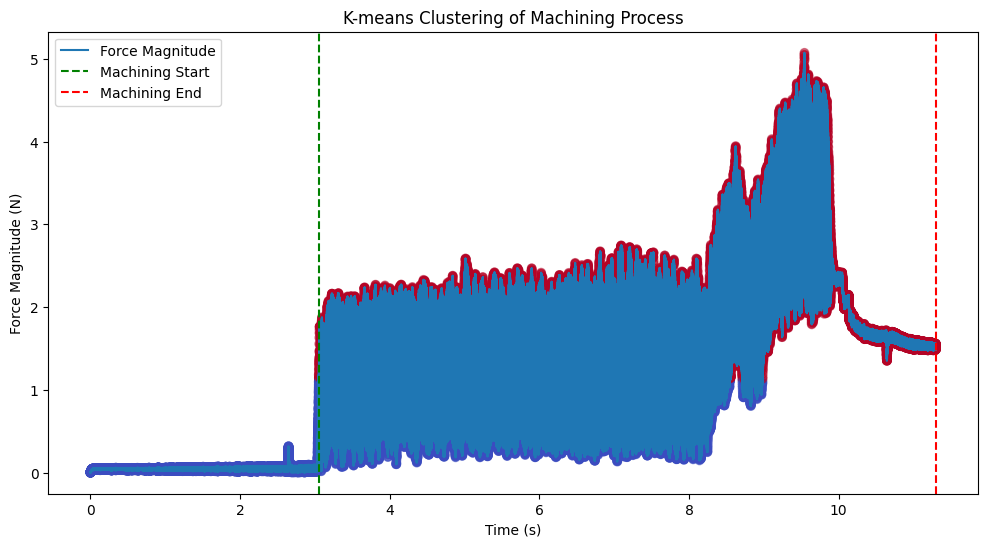

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['Fmag'], label='Force Magnitude')
plt.scatter(df['time'], df['Fmag'], c=df['cluster'], cmap='coolwarm', alpha=0.5)
plt.axvline(start_time, color='green', linestyle='--', label='Machining Start')
plt.axvline(end_time, color='red', linestyle='--', label='Machining End')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Force Magnitude (N)")
plt.title("K-means Clustering of Machining Process")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
print("Inertia (WCSS):", inertia)

if len(set(clusters)) > 1:
    sil_score = silhouette_score(X, clusters)
    print("Silhouette Score:", sil_score)
else:
    print("Silhouette Score not defined for a single cluster.")


Inertia (WCSS): 59914.52949736611
Silhouette Score: 0.642541251216372
